In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from cv2 import imshow
import tensorflow as tf
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.14.0'

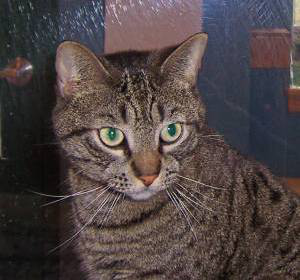

In [2]:
image.load_img("cat_dog_2\\training_set\cat\cat.1.jpg")


In [2]:
# Try changing and adding more parameters here to create more variations in the image, and more training data
training_generator = ImageDataGenerator( rescale=1./255,
                                        rotation_range=45,
                                        horizontal_flip=True,
                                        shear_range=0.3,
                                        zoom_range=0.2,
                                        fill_mode='constant',
                                        # brightness_range=(0.5, 1.5),
                                        )

In [3]:
train_dataset = training_generator.flow_from_directory('cat_dog_2\\training_set',
                                                        target_size=(64,64), 
                                                        batch_size=16, 
                                                        class_mode='categorical',
                                                        shuffle=True
                                                        )

Found 4000 images belonging to 2 classes.


In [29]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

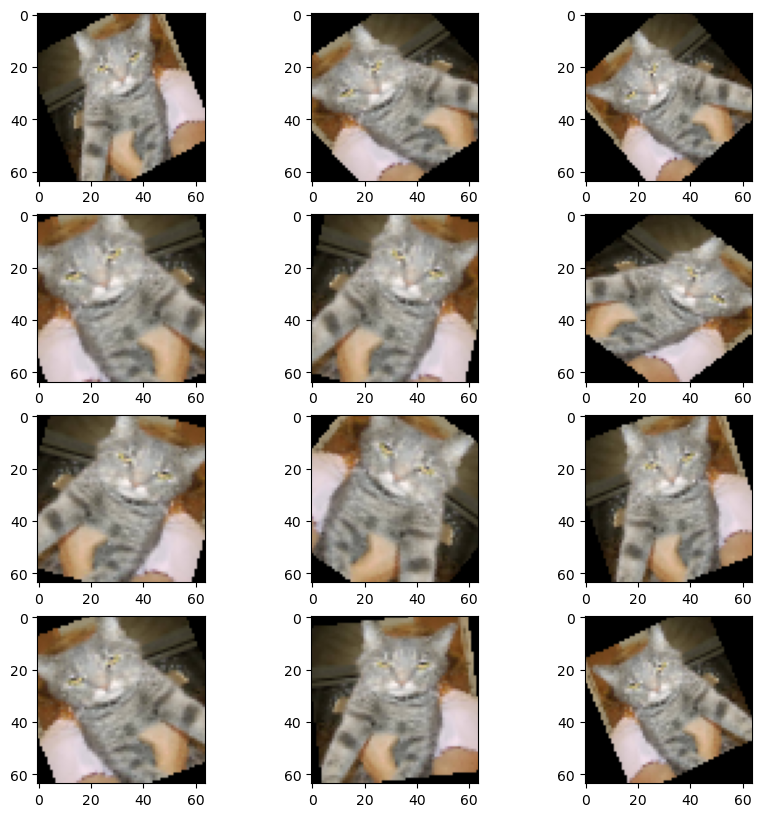

In [31]:

fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train_dataset[1][0][0])
axs[0][1].imshow(train_dataset[1][0][0])
axs[0][2].imshow(train_dataset[1][0][0])
axs[1][0].imshow(train_dataset[1][0][0])
axs[1][1].imshow(train_dataset[1][0][0])
axs[1][2].imshow(train_dataset[1][0][0])
axs[2][0].imshow(train_dataset[1][0][0])
axs[2][1].imshow(train_dataset[1][0][0])
axs[2][2].imshow(train_dataset[1][0][0])
axs[3][0].imshow(train_dataset[1][0][0])
axs[3][1].imshow(train_dataset[1][0][0])
axs[3][2].imshow(train_dataset[1][0][0])

In [4]:
# No variations are needed for testing as we are just testing and not training
test_generator = ImageDataGenerator(rescale=1. / 255) # This retains it's RGB color palette

test_dataset = test_generator.flow_from_directory('cat_dog_2\\test_set',
                                                        target_size=(64,64), 
                                                        batch_size=1, 
                                                        class_mode='categorical',
                                                        shuffle=False
                                                        )

Found 1000 images belonging to 2 classes.


In [5]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

            
network.add(Flatten())
# network.add(GlobalAveragePooling2D())

# network.add(Dense(units=512, activation='relu')) # units are the numbers of values after flattening the previous layer. (Neurons + 2) / 2 
network.add(Dense(units=577, activation='relu'))
network.add(Dropout(rate=0.5))
# network.add(Dense(units=256, activation='relu')) # worked
network.add(Dense(units=128, activation='relu'))
network.add(Dense(units=64, activation='relu')) # worked
# network.add(Dense(units=32, activation='relu'))
# network.add(Dense(units=16, activation='relu'))
network.add(Dense(units=2, activation='softmax')) # returns probability for each class. Sigmoid would return probability for 1 class

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [24]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate you want to use
# learning_rate = 0.003  # Example learning rate
learning_rate = 0.001  # Example learning rate
# learning_rate = 0.0005  # Example learning rate

# Instantiate the Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile your neural network model with the customized optimizer
# network.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
network.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = network.fit(train_dataset, epochs=70)

Epoch 1/70
250/250 [==============================] - 54s 203ms/step - loss: 0.3694 - accuracy: 0.8418
Epoch 2/70
250/250 [==============================] - 66s 265ms/step - loss: 0.3613 - accuracy: 0.8438
Epoch 3/70
250/250 [==============================] - 69s 274ms/step - loss: 0.3709 - accuracy: 0.8273
Epoch 4/70
250/250 [==============================] - 61s 245ms/step - loss: 0.3541 - accuracy: 0.8468
Epoch 5/70
250/250 [==============================] - 52s 208ms/step - loss: 0.3519 - accuracy: 0.8385
Epoch 6/70
250/250 [==============================] - 46s 183ms/step - loss: 0.3482 - accuracy: 0.8420
Epoch 7/70
250/250 [==============================] - 46s 183ms/step - loss: 0.3525 - accuracy: 0.8497
Epoch 8/70
250/250 [==============================] - 46s 184ms/step - loss: 0.3487 - accuracy: 0.8397
Epoch 9/70
250/250 [==============================] - 50s 199ms/step - loss: 0.3494 - accuracy: 0.8422
Epoch 10/70
250/250 [==============================] - 51s 204ms/step - l

In [26]:
predictions = network.predict(test_dataset)
predictions

1000/1000 [==============================] - 11s 11ms/step


array([[3.89472693e-01, 6.10527337e-01],
       [1.21533744e-01, 8.78466249e-01],
       [6.14051700e-01, 3.85948330e-01],
       ...,
       [1.31517852e-04, 9.99868512e-01],
       [2.01466575e-01, 7.98533440e-01],
       [2.29069192e-05, 9.99977112e-01]], dtype=float32)

In [27]:
# predicted values
predictions = np.argmax(predictions, axis=1)
predictions 

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

In [28]:
# expected output
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

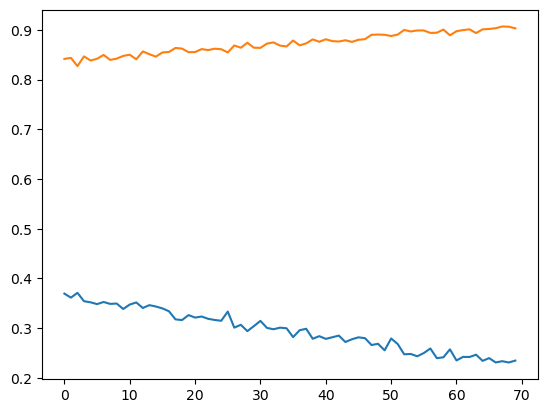

In [29]:
plt.plot(history.history['loss'] )
plt.plot(history.history['accuracy'] )

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(test_dataset.classes, predictions)

0.827

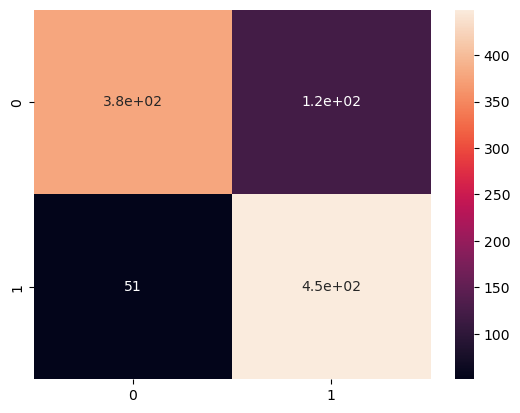

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True);

In [32]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       500
           1       0.79      0.90      0.84       500

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



## Save and Load Weights

In [33]:
model_json = network.to_json()
with open('network3.json', 'w') as json_file:
    json_file.write(model_json)

In [34]:
from keras.models import save_model
network_saved = save_model(network, 'weights3.hdf5')

C:\Users\HP\AppData\Local\Temp\ipykernel_31556\1507598169.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, 'weights3.hdf5')


In [35]:
with open('network3.json', 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bia

In [36]:
import tensorflow as tf
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights3.hdf5')

# network_loaded.compile(optimizer = 'Adam', loss='categorical_crossentropy',metrics=['accuracy'])

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
network_loaded.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [41]:
import cv2
from cv2 import imshow

image = cv2.imread('cat_test.jpg')
image = cv2.resize(image, (64,64))
image = image / 255
image = image.reshape(-1, 64,64,3)
result = network_loaded.predict(image)
import numpy as np

result = np.argmax(result)

if result == 0:
    print('Cat')
else:
    print('Dog')


1/1 [==============================] - 0s 29ms/step
Dog


In [39]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}